**Building a Model to Predict QB Pass Completion**
*by Ben Diner*

In American football, two teams of 11 players play on a rectangular field. The player in the quarterback position is the player who passes the football, and is generally seen as a leader of the team, calling plays and sometimes modifying them according to his analysis of the defense's strategy. 

A QB's success can be measured by his pass completion rate, and we will attempt to determine whether the following variables-height, weight, years in the NFL, and whether or not the QB was a draft pick-can give predictive power to the QB's pass completion rate. Height allows the QB to see over the defensive line, allowing better sight lines for passing. Weight can inhibit the QB from rushing out of the pocket, should he feel the need to run the ball instead of passing it due to defensive pressure. Years in the NFL is a measure of experience. We should note that survivorship bias plays in here, as bad QBs will not stay in the league (i.e. we are unlikely to find QBs with very low pass completion rates remaining in the NFL past a short time). Finally, whether the player was drafted in the annual NFL draft accounts for his talent as judged upon entrance into pro football. 

Data comes from ProFootball, NFL.com, and FFToday for the 2015 season. Our data includes the 73 NFL QBs who were designated at least part-time starters. First, let's look at our imported csv file and descriptive statistics. QB entries are designated with an 1 under halfseason if a QB started at least half a season, per NFL.com. 

Packages used are Pandas, matplotlib, and statsmodels.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline


In [146]:
path = 'C:\\Users\\Ben\\Downloads\\\\NFL QB data1.csv'
QB1=pd.read_csv(path)
QB1.head()

,Name,Team,Draft Pick (0/1),Weight,Years in NFL,Pass Cpl,Height (in),Yards,halfseason
0,Philip Rivers,SDG,1,228,12,66.1,76,4792,1
1,Drew Brees,NOR,1,209,15,68.3,72,4870,1
2,Tom Brady*,NWE,1,225,16,64.4,76,4770,1
3,Eli Manning*,NYG,1,218,12,62.6,76,4436,1
4,Matt Ryan,ATL,1,220,8,66.3,76,4591,1


In [147]:
QB1.shape

(73, 9)

In [148]:
QB1.describe()

,Draft Pick (0/1),Weight,Years in NFL,Pass Cpl,Height (in),Yards,halfseason
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.849315,223.931507,6.958904,63.550685,75.246575,1815.931507,0.465753
std,0.360217,10.370000,4.429818,12.755360,1.854280,1702.231161,0.502278
min,0.000000,200.000000,1.000000,25.000000,71.000000,4.000000,0.000000
25%,1.000000,217.000000,3.000000,58.700000,74.000000,150.000000,0.000000
50%,1.000000,224.000000,5.000000,62.600000,76.000000,1276.000000,0.000000
75%,1.000000,230.000000,11.000000,66.400000,77.000000,3659.000000,1.000000
max,1.000000,245.000000,18.000000,100.000000,79.000000,4870.000000,1.000000


In [149]:
PassCpl=QB1["Pass Cpl"]
Weight=QB1["Weight"]
Height=QB1["Height (in)"]
DraftPick=QB1["Draft Pick (0/1)"]
YearsinNFL=QB1["Years in NFL"]


From the data, we see that the typical QB is around 6'3", has been in the NFL 5-10 years, and weighs around 20 lbs over 200. 

Interpreting the descriptive statistics for Draft Pick, a group category, does not add much to our understanding just yet. Let's see what this data looks like in plotted form:

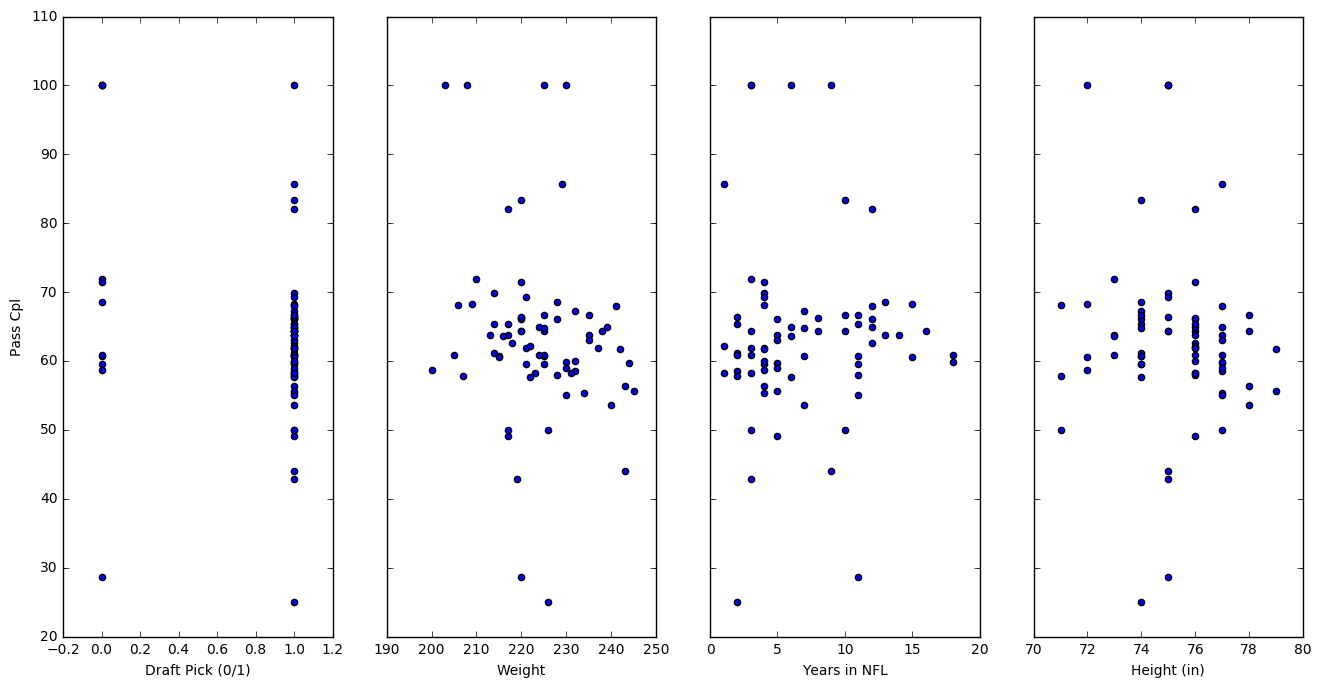

In [150]:
fig, axs=plt.subplots(1,4,sharey=True)
QB1.plot(kind="scatter", x="Draft Pick (0/1)", y="Pass Cpl", ax=axs[0], figsize=(16,8))     
QB1.plot(kind="scatter", x="Weight", y="Pass Cpl", ax=axs[1])
QB1.plot(kind="scatter", x="Years in NFL", y="Pass Cpl", ax=axs[2])
QB1.plot(kind="scatter", x="Height (in)", y="Pass Cpl", ax=axs[3])

Already we notice there does not seem to be much of a direct relationship between pass completion rate and any of the possible predicting variables. 

Additionally, we see outliers in the plots above. At least one QB has an unusually high pass completion rate despite his relative lack of height. Several QBs have high pass completion rates despite not having played many seasons. And one to two QBs have a higher pass completion rate relative to their weight that we might not have expected.

We should note at this point that the 73 QBs in this sample may have only played a few games or thrown one or two good passes--as is visible from the min of 4 yards from descriptive statistics above--and we will address this. 

Next, let's look at the regression of pass completion rate on the four variables. Our hypothesis tests will be: 

    H_0(null): B_1=B_2=B_3=B_4=0
    H_A(alternate): Some B_j !=0, j=1,2...4
   

In [151]:
model1 = ols("PassCpl ~ Weight + Height + DraftPick + YearsinNFL", data=QB1).fit()
print model1.summary()

                            OLS Regression Results                            
Dep. Variable:                PassCpl   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.546
Date:                Wed, 21 Dec 2016   Prob (F-statistic):              0.199
Time:                        13:30:39   Log-Likelihood:                -285.76
No. Observations:                  73   AIC:                             581.5
Df Residuals:                      68   BIC:                             593.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     67.0185     63.237      1.060      0.2

We see that the regression equation is as follows: 
If draft pick=0: PassCpl=67.0 + 0.83(Height) + 0.090(YearsinNFL)-0.270(Weight), 
If draft pick=1: PassCpl=60.1 + 0.83(Height) + 0.090(YearsinNFL)-0.270(Weight)

We can interpret this as, for instance: for a 1 inch increase in Height, holding all else fixed, there is associated a pass completion percentage increase of 0.83 percentage points. 

From the low R^2 and high p-values of both the F-test and individual coefficient tests, we can tell this is not the best model we can find. We need not interpret the intercept since Height, Weight and Years in the NFL cannot equal 0. Let's check residual plots. 

Since we are doing a multivariate regression, we need to look at the relationship between PassCpl and the independent variables conditional on the other independent variables.

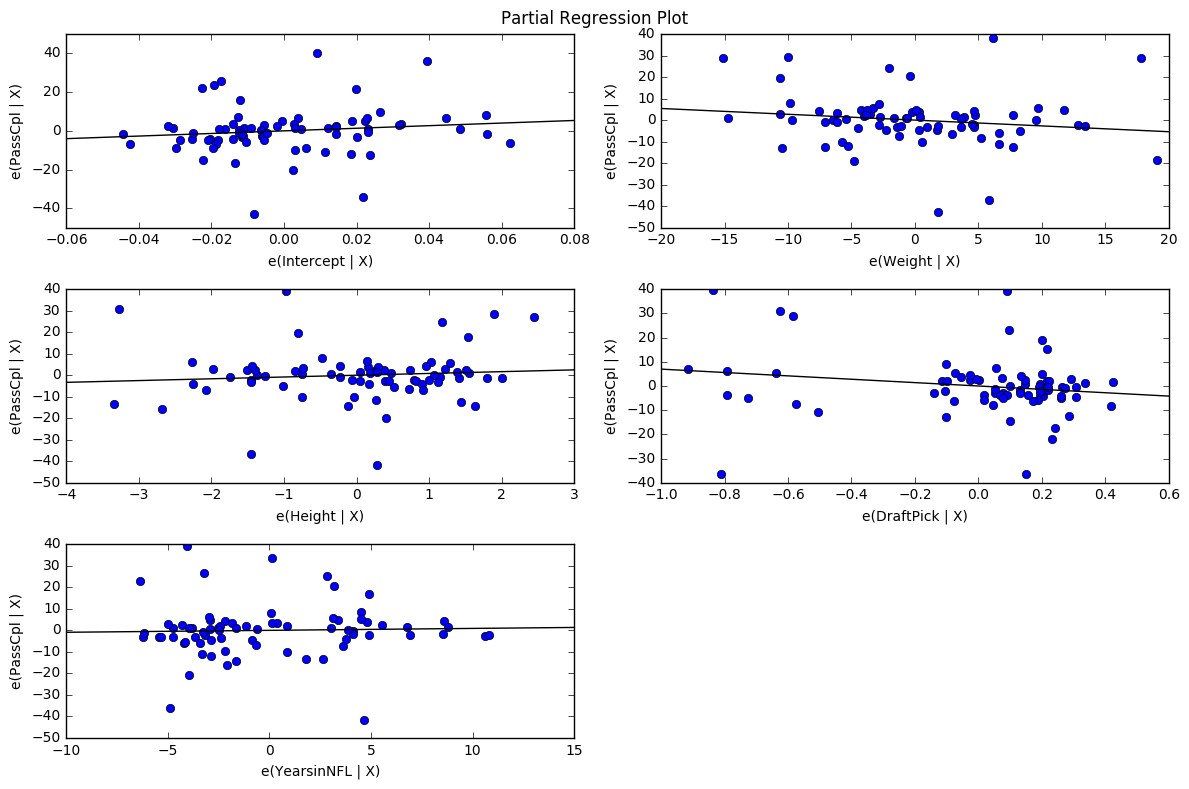

In [152]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model1, fig=fig)

The residuals do not appear normally distributed, and seem to have nonconstant variance. We see a lack of independence in the residuals. There are a number of outlier and leverage points visible as well. 

Let's take a closer look at the influential points, looking at h_ii leverage and Cook's Distance:


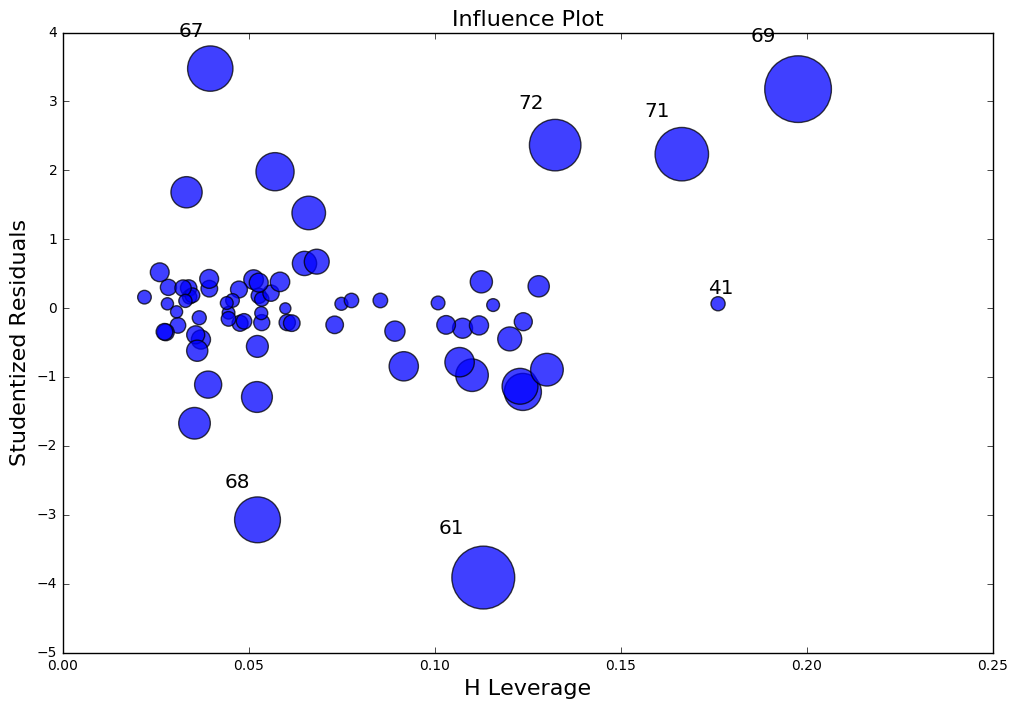

In [153]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model1, ax=ax, criterion="cooks")

Per Simonoff 2016, we calculate that we should investigate h_ii leverage values above .171. We find that 41 - Tony Romo, 69 - Chase Daniel and 71 - Matt Moore have high leverage values. We also examine Cook's Distance for influential points. None of the QBs exhibit a Cook's D over 1 (per Simonoff 2016), but 61 - Shaun Hill, 69 - Chase Daniel, 71 - Matt Moore, and 72 - Scott Tolzien exhibit higher Cook's D than their peers. 

We'll take the above diagnostic data into account on our next regression pass. We are wondering whether this first regression model can be simplified. We can tell immediately that there are a number of QBs in our sample who have not played much. This may be affecting our results. Let's examine the predictive power of our variables for players with more time on the field this season.

So, let's include only QBs who played over half a season. This is the qualifier NFL.com uses to determine QB rankings. This excludes those players who, due to injury or other reasons, could not play much this season. We'll use the same potential predicting variables here: Height, Weight, Years in NFL and Draft Pick (0/1). 

First, we grab the desired QBs:

In [154]:
QB2 = QB1[[x==1 for x in QB1["halfseason"]]]
QB2.head()

,Name,Team,Draft Pick (0/1),Weight,Years in NFL,Pass Cpl,Height (in),Yards,halfseason
0,Philip Rivers,SDG,1,228,12,66.1,76,4792,1
1,Drew Brees,NOR,1,209,15,68.3,72,4870,1
2,Tom Brady*,NWE,1,225,16,64.4,76,4770,1
3,Eli Manning*,NYG,1,218,12,62.6,76,4436,1
4,Matt Ryan,ATL,1,220,8,66.3,76,4591,1


In [155]:
QB2.shape

(34, 9)

In [156]:
PassCpl2=QB2["Pass Cpl"]
Weight2=QB2["Weight"]
Height2=QB2["Height (in)"]
DraftPick2=QB2["Draft Pick (0/1)"]
YearsinNFL2=QB2["Years in NFL"]


We are left with 34 QBs, which is a large reduction in our sample size. However, since n>30, we can use the Central Limit Theorem to assume an approximately normal distribution. 

Let's check scatter plots again:


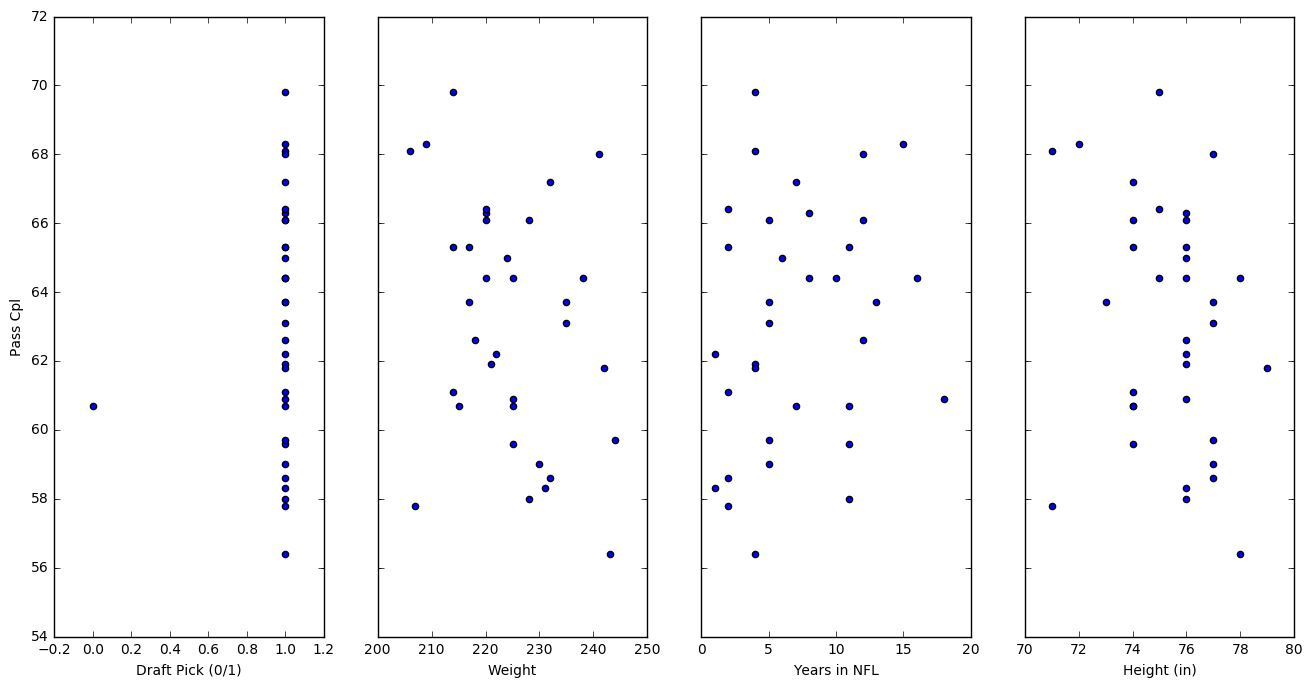

In [157]:
fig, axs=plt.subplots(1,4,sharey=True)
QB2.plot(kind="scatter", x="Draft Pick (0/1)", y="Pass Cpl", ax=axs[0], figsize=(16,8))     
QB2.plot(kind="scatter", x="Weight", y="Pass Cpl", ax=axs[1])
QB2.plot(kind="scatter", x="Years in NFL", y="Pass Cpl", ax=axs[2])
QB2.plot(kind="scatter", x="Height (in)", y="Pass Cpl", ax=axs[3])

Again, there does not seem to be much of a direct relationship between any of the potential predicting variables and pass completion rate. Let's perform the regression. Our hypotheses:
    H_0: B_1=B_2=B_3=B_4=0
    H_A: Some B_j !=0
    

In [158]:
model2 = ols("PassCpl2 ~ Weight2 + Height2 + DraftPick2 + YearsinNFL2", data=QB2).fit()
print model2.summary()

                            OLS Regression Results                            
Dep. Variable:               PassCpl2   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.536
Date:                Wed, 21 Dec 2016   Prob (F-statistic):              0.218
Time:                        13:30:41   Log-Likelihood:                -87.027
No. Observations:                  34   AIC:                             184.1
Df Residuals:                      29   BIC:                             191.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      81.7456     26.623      3.070      

Interpreting the regression equation once again, not taking into account interpretation of the intercept for the above reasons, we can say, for instance: Holding all else fixed, a 1 inch increase in Height is associated with an increase of 0.087 percentage points in pass completion.

We notice that R^2 has improved, though we note still high p-values for the F-test and individual coefficient t-tests. Our residual standard error has also decreased quite a bit, lending this model a more narrow prediction interval. Let's again check residual plots:


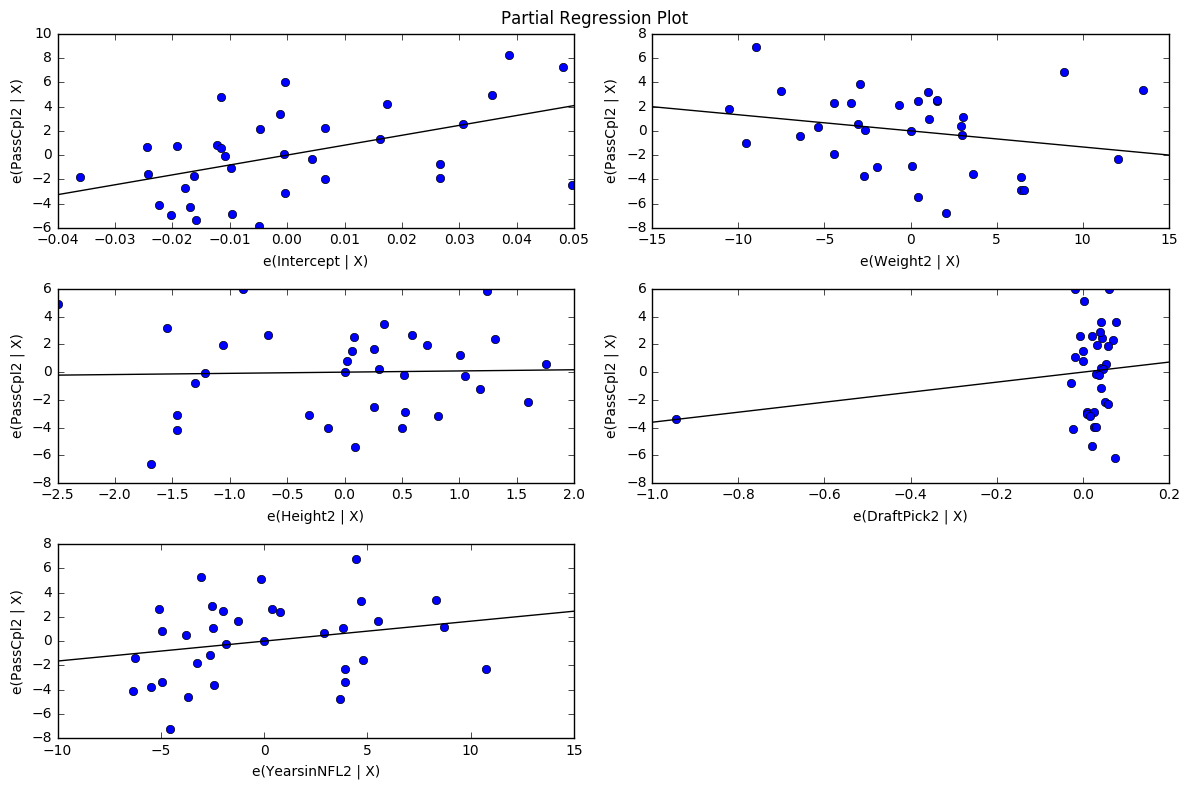

In [159]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)

The errors now appear to be more normally distributed than they were on the first pass. There seems to be more constant variance than before. Error independence may be violated as well. 

Checking diagnostics, of interest as outliers with high standardized residuals are Johnny Manziel and Ben Roethlisberger. Johnny Manziel ran into personal trouble this season, perhaps explaining his worse-than-predicted performance this season. Roethlisberger seems to have had a better season that we would have expected. For leverage points, we examine those with an h_ii value above .368. The only QB who exhibits this is Brian Hoyer, who has an h_ii of 1. It appears that Hoyes is the only QB who was not drafted and yet played over half of the season. We might have reasoned the impact his inclusion would have on the regression by looking at the scatterplot where all but Hoyer were drafted.

For Cook's D, we see that Johnny Manziel is the most noticeable QB whom we might want to investigate, though his Cook's D is high only relative to his peers. We might reason that the Draft Pick categorical variable is not explanatory enough to warrant inclusion in this analysis. Given its high p-value in the individual coefficient t-tests, this seems reasonable. Let's see what happens if we remove that categorical variable and are left with the Height, Weight and Years in the NFL variables.

Our hypothesis test changes to: 
    H_0: B_1=B_2=B_3=0
    H_A: Some B_j !=0, j=1...3

In [160]:
QB3=QB2.drop("Draft Pick (0/1)", axis=1)
QB3.head()

,Name,Team,Weight,Years in NFL,Pass Cpl,Height (in),Yards,halfseason
0,Philip Rivers,SDG,228,12,66.1,76,4792,1
1,Drew Brees,NOR,209,15,68.3,72,4870,1
2,Tom Brady*,NWE,225,16,64.4,76,4770,1
3,Eli Manning*,NYG,218,12,62.6,76,4436,1
4,Matt Ryan,ATL,220,8,66.3,76,4591,1


In [161]:
QB3.shape

(34, 8)

In [162]:
PassCpl3=QB3["Pass Cpl"]
Weight3=QB3["Weight"]
Height3=QB3["Height (in)"]
YearsinNFL3=QB3["Years in NFL"]

In [163]:
model3 = ols("PassCpl3 ~ Weight3 + Height3 + YearsinNFL3", data=QB3).fit()
print model3.summary()

                            OLS Regression Results                            
Dep. Variable:               PassCpl3   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.685
Date:                Wed, 21 Dec 2016   Prob (F-statistic):              0.191
Time:                        13:30:41   Log-Likelihood:                -87.647
No. Observations:                  34   AIC:                             183.3
Df Residuals:                      30   BIC:                             189.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      83.3049     26.615      3.130      

While the lower p-value of the F-test indicates that this model might move us closer to rejecting the null hypothesis, we should note that both R^2 and R^2 (adj) decreased. This indicates that the model is explaining less of the variation than the previous ones. This is despite the increased simplicity resulting from the removal of a predictive variable. Our lack of interpretatio of the intercept stands. We would interpret the regression equation as, for a 1 inch increase in height, holding all else fixed, a QB's pass completion rate has an associated increase of 0.079 percentage points. 

Let's check residual plots:


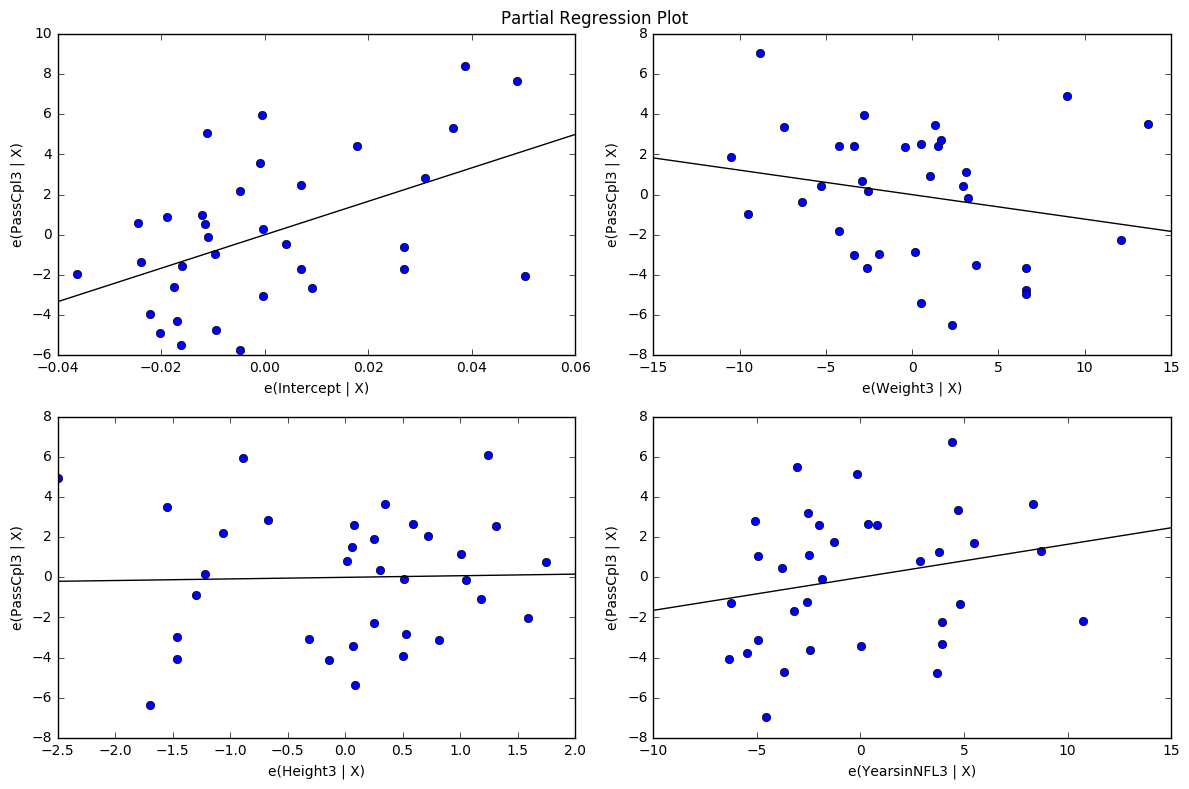

In [164]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model3, fig=fig)

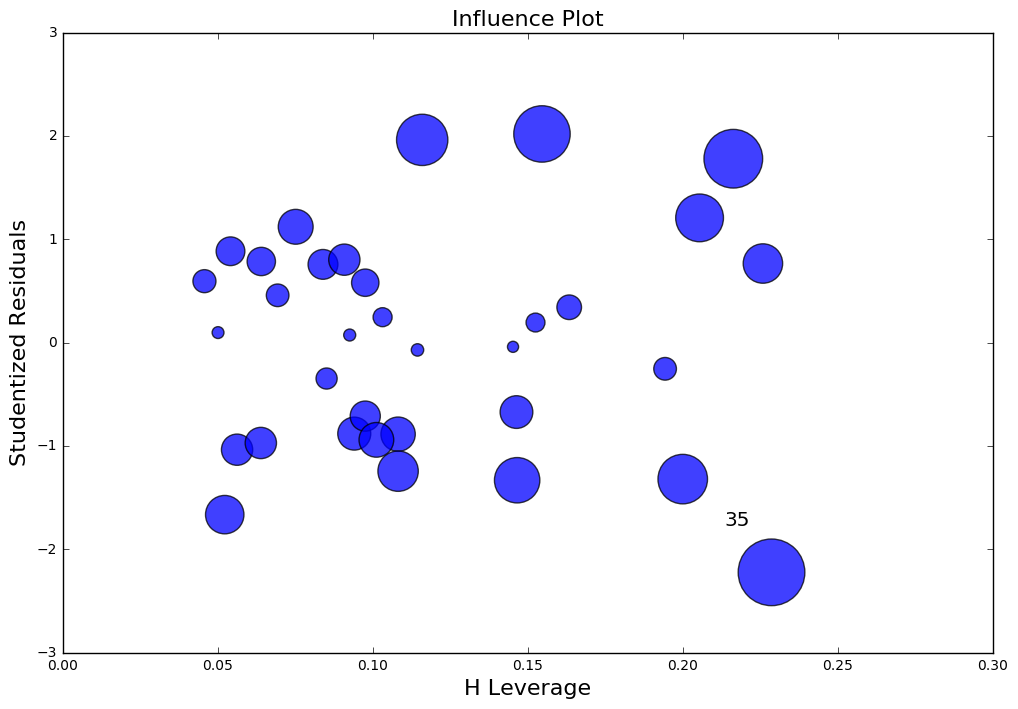

In [165]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model3, ax=ax, criterion="cooks")

The residuals look normally distributed, with more constant variance. 

Checking diagnostics, of interest as outliers according to their high standardized residuals are Matthew Stafford, Kirk Cousins, Ben Roethlisberger, Johnny Manziel and Matt Cassel. Again, Manziel ran into personal problems this season, so his lower-than-expected performance is understood. Matt Cassel bounced around the league this season, perhaps explaining his lower-than-expected performance (i.e. different playbooks, coaching staffs, etc). None of the residuals for these players was above the abs(2.5) benchmark, but they were high compared to their peers.

For leverage points, we calculate we should investigate points above .294 in h_ii measure. None of the QBs pass this measure, though we note Drew Brees, Matthew Stafford, Russell Wilson and Johnny Manziel have high measures compared to their peers. For Cook's D, only Manziel again stands out, though his measure is below 1. Again, we take into account the effect his personal problems had on him this season. 

Before concluding, we mght want to see the results of removing Manziel from the analysis, given his unique circumstances. We are left with 33 QBs. We again seek to find a better explanatory model for pass completion rate based on Height, Weight and Years in the NFL. 


In [166]:
QB4=QB3[QB3["Name"] !="Johnny Manziel"]

In [167]:
QB4.head()

,Name,Team,Weight,Years in NFL,Pass Cpl,Height (in),Yards,halfseason
0,Philip Rivers,SDG,228,12,66.1,76,4792,1
1,Drew Brees,NOR,209,15,68.3,72,4870,1
2,Tom Brady*,NWE,225,16,64.4,76,4770,1
3,Eli Manning*,NYG,218,12,62.6,76,4436,1
4,Matt Ryan,ATL,220,8,66.3,76,4591,1


In [168]:
QB4.shape

(33, 8)

In [169]:
PassCpl4=QB4["Pass Cpl"]
Weight4=QB4["Weight"]
Height4=QB4["Height (in)"]
YearsinNFL4=QB4["Years in NFL"]

Once again, we examine scatterplots first:

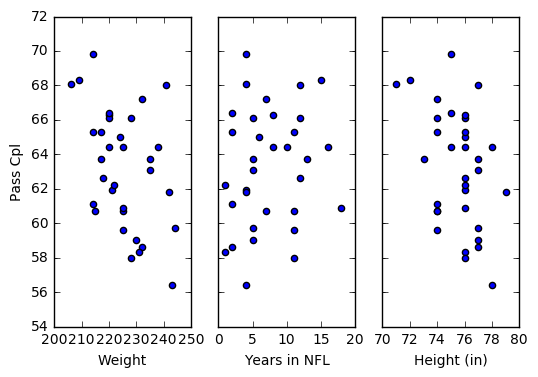

In [170]:
fig, axs=plt.subplots(1,3,sharey=True)   
QB4.plot(kind="scatter", x="Weight", y="Pass Cpl", ax=axs[0])
QB4.plot(kind="scatter", x="Years in NFL", y="Pass Cpl", ax=axs[1])
QB4.plot(kind="scatter", x="Height (in)", y="Pass Cpl", ax=axs[2])

Again, we do not see much of a direct relationship between any of the variables and pass completion rate. Let's perform the analysis again. The hypothesis test remains:
    
    H_0: B_1=B_2=B_3=0
    H_A: Some B_j !=0, j=1...3
   

In [171]:
model4 = ols("PassCpl4 ~ Weight4 + Height4 + YearsinNFL4", data=QB4).fit()
print model4.summary()

                            OLS Regression Results                            
Dep. Variable:               PassCpl4   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     2.613
Date:                Wed, 21 Dec 2016   Prob (F-statistic):             0.0702
Time:                        13:30:43   Log-Likelihood:                -82.963
No. Observations:                  33   AIC:                             173.9
Df Residuals:                      29   BIC:                             179.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     108.3047     27.428      3.949      

This is the first model we've developed that allows us to reject the null hypothesis in favor of the alternative hypothesis. In other words, at least one of the potential predicting variables is explanatory. A higher R^2 and R^2 (adj) than before indicate that this model explains more of the variability than the others. Interestingly, removing Manziel has given us the highest percentage of variability accounted for throughout all the previous models. We could explain this because of his high Cook's D, or high bad leverage. Let's check residual plots:

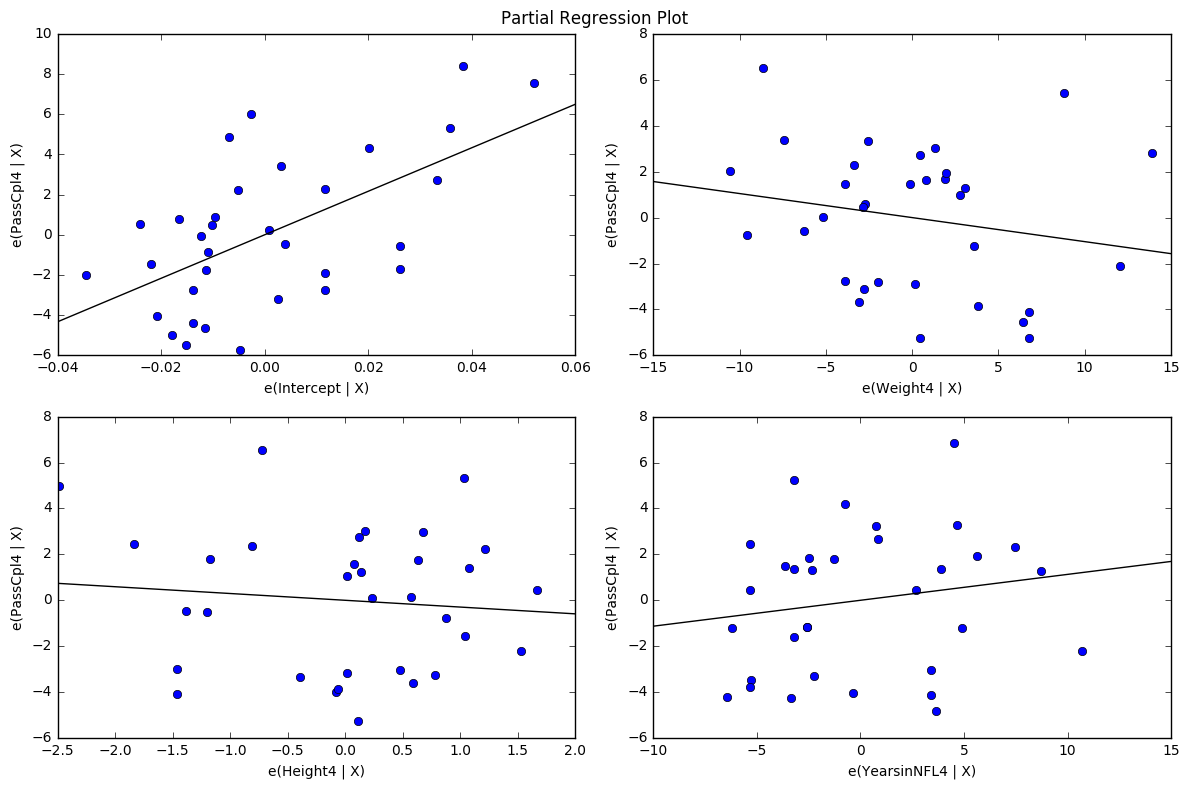

In [172]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model4, fig=fig)

We see a deviation from the approximately normal distribution of the models we developed before, with what appear to be shorter tails. This violates the assumption of the errors being normally distributed. 


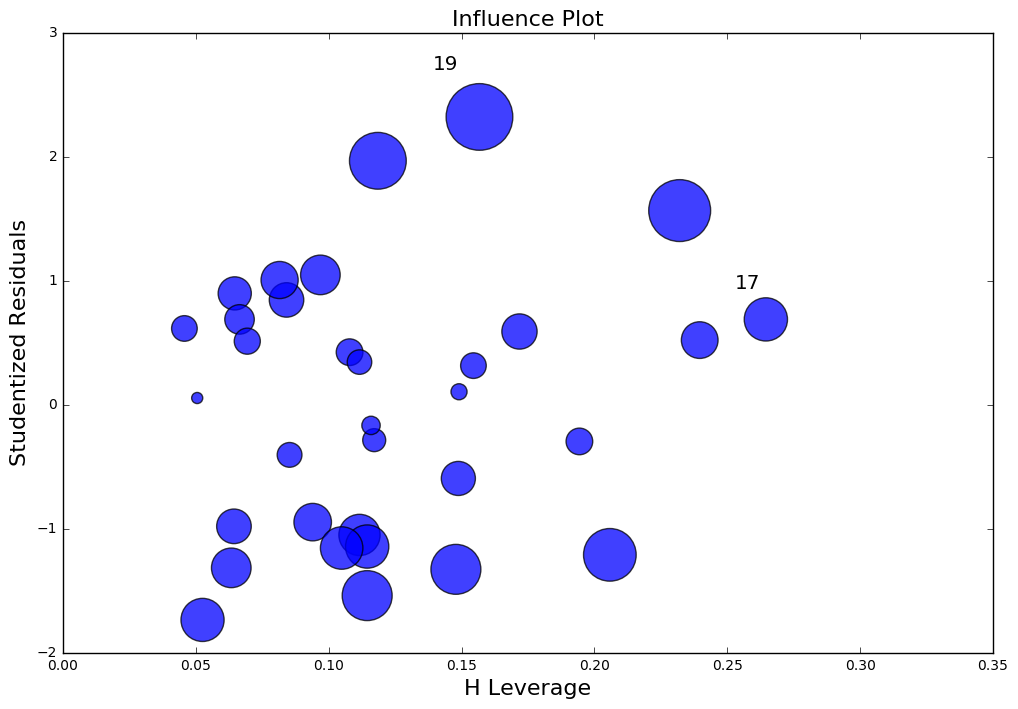

In [173]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model4, ax=ax, criterion="cooks")

Checking diagnostics, Kirk Cousins, Ben Roethlisberger and Matt Cassel exhibit potential for being outliers due to the magnitude of their standardized residuals, though they are below 2.5. Cassel bounced around the league, perhaps explaining his lower-than-expected pass completion rate performance. Cousins and Roethlisberger simply had greater seasons than we might have expected. We check leverage points with an h_ii above .303. We find none, though we might note Russell Wilson has a higher h_ii measure relative to his peers. This may be because of his relative lack of height compared to his peers, at 71 inches. 

Looking at Cook's D, we find no QBs with a Cook's D above 1, though Roethlisberger stands out relative to his peers in this measure. We might explain his potential for bad leverage from his high number of years in the NFL (12), height (77 in.), and Weight (241 lbs). Because our overall F-statistic is significant, and its p-value considerably smaller than those of the t-tests which are not significant, we should investigate the possibility for collinearity. We look for a VIF above max (10, 1.27).

We do not find this, and we could state that either the predictors are more related to pass completion rate than they are to each other, or that they are not related to each other very much. 

From here, we should check whether this is the model that best balances fit and simplicity. Specifically, for the new data set that only includes designated full-time QBs who played over half the season, with Manziel removed due to personal problems, and the Draft Pick categorical variable removed due to lack of predictive power. 

Off-screen, a best subsets regression indicates that the model with smallest Mallows C_p is the 1-variable model for Weight, and so we choose Weight as our sole predicting variable.

Our hypothesis test:

    H_0: B_1=0
    H_A: B_1 !=0
    
    

In [174]:
model5 = ols("PassCpl4 ~ Weight4", data=QB4).fit()
print model5.summary()


                            OLS Regression Results                            
Dep. Variable:               PassCpl4   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     6.843
Date:                Wed, 21 Dec 2016   Prob (F-statistic):             0.0136
Time:                        13:30:43   Log-Likelihood:                -83.619
No. Observations:                  33   AIC:                             171.2
Df Residuals:                      31   BIC:                             174.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     96.2191     12.617      7.626      0.0

Our F-test is statistically significant at a p-value of 0.0136, as is the Weight variable in its individual t-test. The p-values are the same since this has become a single-variable regression. 

This is our final model. We can interpret the regression equation as: for a 1 lb increase in Weight, there is an associated decrease in pass completion rate of .146 percentage points. Again, we do not attempt to explain the intercept physically. We recognize of course in this final analysis that there is more to a QB's pass completion rate than solely his weight. Further models with additional variables might remedy this in the future. There is certainly room for further analysis, as our R^2 and R^2 (adj) are .181 and .154, respectively. For now, we conclude with this model, which indicates that Weight is our preferred model for pass completion rate. As mentioned above, data comes from ProFootball, NFL.com, and FFToday for the 2015 season. Statistical guidelines from Simonoff 2016.